In [48]:
# SECOND QUESTION
# find the top 10 major project themes (using column 'mjtheme_namecode')

In [58]:
# import libraries

import pandas as pd
import json 
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# import data

original_json_df = pd.read_json('data/world_bank_projects.json')

In [60]:
# create a list with all different project themes from the 'mjtheme_namecode' column and 
# add 'count' element as a key:value pair, that represents the frequency for each project theme

new_list = []
count = 0

# First go through all elements in 'mjtheme_namecode' column
for entry in original_json_df['mjtheme_namecode']:
    for sub_entry in entry:
        check = 0
        # if 'new_list' is empty, add the element 'sub_entry' and start count for that project theme
        if len(new_list) == 0:
            sub_entry['count'] = 1
            new_list.append(sub_entry)
        else:
            # go through elements of the 'new_list'
            for element in new_list:
                # if both elements codes match
                if sub_entry['code'] == element['code']:
                    element['count'] += 1
                    # if the name of the element in 'new_list' is empty and the name from the 'sub_entry' element is not
                    if element['name'] == '' and sub_entry['name'] != '':
                        # assaign element from 'new_list' the name the 'sub_entry' element
                        element['name'] = sub_entry['name']
                    check = 1
            if check !=1:
                sub_entry['count'] = 1
                new_list.append(sub_entry)

#print(new_list)

In [52]:
# in 'new_list' sort elements by count in descending order

sorted_list = sorted(new_list, key=lambda k: k['count'], reverse=True) 
#sorted_list

In [53]:
# select the first 10 most popular project themes

first_10 = sorted_list[:10]
#first_10


In [54]:
# from the list with different project themes create a dataframe
# change the order of columns

table_1 = pd.DataFrame(first_10)
table_2 = table_1.reindex(['code', 'name', 'count'], axis=1)
#table_2

In [55]:
# reset the index, start with 1

table_3 = table_2
table_3.index = table_3.index + 1
#table_3

In [56]:
# change column names

ten_project_themes = table_3.rename(columns={'name': 'project_theme', 'count': 'number_of_projects'})
ten_project_themes

,code,project_theme,number_of_projects
1,11,Environment and natural resources management,250
2,10,Rural development,216
3,8,Human development,210
4,2,Public sector governance,199
5,6,Social protection and risk management,168
6,4,Financial and private sector development,146
7,7,Social dev/gender/inclusion,130
8,5,Trade and integration,77
9,9,Urban development,50
10,1,Economic management,38


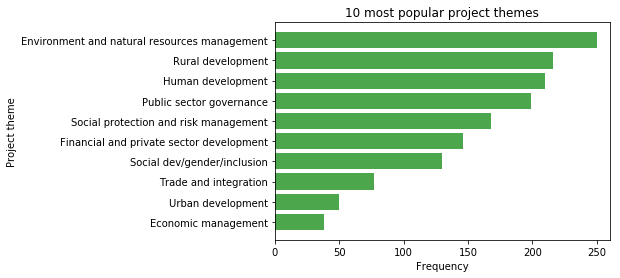

In [57]:
# create a plot with the result
 
# define y-axis
y_pos = np.arange(len(ten_project_themes.project_theme))
index_1 = y_pos[::-1]

# create horizontal bars
plt.barh(index_1, ten_project_themes.number_of_projects, color='green', align='center', alpha=0.7)

# create names on the y-axis
plt.yticks(index_1, ten_project_themes.project_theme)

plt.title('10 most popular project themes') 
plt.xlabel('Frequency')
plt.ylabel('Project theme')

# set the limit on x-axis
plt.xlim(0,260)

# show graphic
plt.show()